In [7]:
def smc_binary(arr1, arr2):
    if len(arr1) != len(arr2):
        raise ValueError("Los arrays deben tener la misma longitud.")
    
    f11 = 0  # Inicializar contador para coincidencias
    f00 = 0  # Inicializar contador para no coincidencias
    K = len(arr1)  # Número total de productos
    print("K:",K)

    for i in range(K):
        if arr1[i] == 1 and arr2[i] == 1:
            f11 += 1
        elif arr1[i] == 0 and arr2[i] == 0:
            f00 += 1
    
    print("f00:",f00)
    print("f11:",f11)
    smc_binary = (f11+f00)/K

    return smc_binary

persona1 = [0,1,0,1]  # Ejemplo de compras de persona 1
persona2 = [0,0,0,1]  # Ejemplo de compras de persona 2
similitud = smc_binary(persona1, persona2)
print(f"Índice SMC: {similitud}")

K: 4
f00: 2
f11: 1
Índice SMC: 0.75


In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def kde(x_train, x_test, sigma):
    """Compute the kernel density estimation
    given the vector of training and the test
    is a value for getting the predicition

    Args:
        x_train (list): training values
        x_test (double): test val
        sigma (double): kernel width

    Returns:
        double: p
    """
    N = len(x_train)
    p_ = 0
    for x in x_train:
        p_ += (1/np.sqrt(2*np.pi*sigma**2)) * np.exp(-(((x_test - x)**2)/(2*sigma**2)))
    p = (1/N) * p_
    return p

In [22]:
yval = []
xval = []
xtest = -4
xtrain = [-3, -1, 5, 6]
p = kde(xtrain, xtest, 0.5)
print(p)
if p<0.015:
    print("p anomaly")
else:
    print("no anomaly")

0.026995486294535458
no anomaly


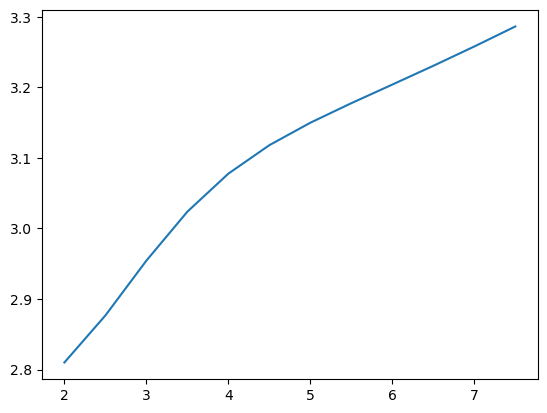

In [17]:
plt.plot(xval, yval)

In [29]:
import pandas as pd

In [34]:
dist_df = pd.DataFrame({
"o1":[0.0,2.6,2.8,2.1,0.8,1.7,3.9,3.8,4.1,4.2],
"o2":[2.6,0.0,1.8,2.3,2.7,1.4,1.9,1.7,2.0,2.2],
"o3":[2.8,1.8,0.0,1.2,2.9,2.1,2.2,1.6,2.3,2.0],
"o4":[2.1,2.3,1.2,0.0,2.4,1.8,2.6,2.5,3.0,2.9],
"o5":[0.8,2.7,2.9,2.4,0.0,2.0,4.2,4.0,4.4,4.5],
"o6":[1.7,1.4,2.1,1.8,2.0,0.0,2.4,2.6,2.7,3.0],
"o7":[3.9,1.9,2.2,2.6,4.2,2.4,0.0,1.2,0.6,1.3],
"o8":[3.8,1.7,1.6,2.5,4.0,2.6,1.2,0.0,1.0,0.6],
"o9":[4.1,2.0,2.3,3.0,4.4,2.7,0.6,1.0,0.0,0.9],
"o10":[4.2,2.2,2.0,2.9,4.5,3.0,1.3,0.6,0.9,0.0]
})

In [35]:
def dendro_plot(
        dist_df,
        Method,
        labels=None,
        sort=False,
        cutoff=None,
        show=True,
        invert_xaxis=True,
    ):
        """
        plots dendrogram given a matrix of distances and a linakge method
        ---------------------------------------------------------
        dist = symmetrical matrix containing distances
        Method = linkage method:
            "single"
            "complete"
            "average"
        orientation = orientation of plot:
            "top"
            "bottom"
            "left"
            "right"
        labels: if not provided labels starting from O1 will be given
        sort: can be set to "ascending" or "descending"
        cutoff = height to cut the tree, if the cutoff line cuts 3 lines, clusters returns labels for 3 clusters

        Output:
            R= dendrogram data
            clusters = cluster labels (0 index), must set cutoff to output
        """

        if labels == None:
            labels = ["O{}".format(i) for i in range(1, dist_df.shape[1] + 1)]

        Z = squareform(dist_df)
        Z = linkage(Z, method=Method)
        R = dendrogram(y, labels = labels, distance_sort = sort,truncate_mode='level', p=3)
        plt.grid()
        if invert_xaxis:
            plt.gca().invert_xaxis()

        if show:
            plt.show()

        if cutoff != None:
            clusters = fcluster(Z, cutoff, criterion="distance")
            clusters = [c - 1 for c in clusters]
            return R, clusters
        else:
            return R


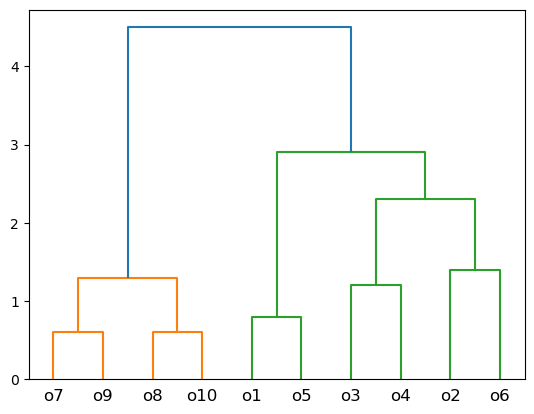

In [37]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


labels = ["o1", "o2", "o3", "o4", "o5","o6", "o7","o8","o9","o10"]

Z = squareform(dist_df)
Z = linkage(Z, method="complete")
R = dendrogram(Z, labels=labels)

# Example labels
labels = ["o1", "o2", "o3", "o4", "o5","o6", "o7","o8","o9","o10"]

# Example usage of dendro_plot